# Lab 4: Evaluation Metrics

##Objective:

Understand the challenges of evaluating binary classifiers on imbalanced real-world datasets and learn how to use the F1 score to assess the performance of logistic regression models effectively.




---



## Goals
In this lab, you will:

- Implement a logistic regression classifier on a real-world dataset.
- Evaluate the model using **accuracy**.
- Analyze the dataset to discover potential issues affecting model performance.
- Learn how to calculate and interpret **precision** and **recall**.
- Understand why certain evaluation metrics may be more appropriate than others.
- Apply resampling techniques to address any issues discovered.
- Visualize model performance using **Precision-Recall** and **ROC** curves.


First, we will import the necessary libraries and functions that we will use:

- **Pandas** for data manipulation and analysis.
- **NumPy** for numerical computations.
- **Scikit-learn** functions:
  - `LogisticRegression` for building the logistic regression model.
  - Evaluation metrics like `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `classification_report`.
  - `train_test_split` for splitting the dataset.
  - `StandardScaler` for feature scaling.
- **Matplotlib** and **Seaborn** for data visualization.
- **Imbalanced-learn** library (installed later if needed).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set_style('whitegrid')


## 1. Load the Dataset

We will use the **Credit Card Fraud Detection** dataset, which contains transactions made by credit card holders. Our goal is to build a model that can predict whether a transaction is fraudulent or not.

---

**Instructions:**

- Download the  data file `creditcard.csv`, to your harddrive, and then you can load it into the temporal workspace of Colab (see what you did in Lab 1 for further instructions).
- Next, load the dataset into a Pandas DataFrame.
- Display the first few rows of the dataset to get an initial understanding.



In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('creditcard_reduced.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
data.head()


Saving creditcard_reduced.csv to creditcard_reduced.csv
First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
2,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
3,24,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
4,32,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0


## 2. Data Preprocessing

Before building the model, we need to preprocess the data.

---

**Instructions:**

- Check for missing values.
- Scale the 'Amount' and 'Time' features using `StandardScaler`.
- Drop the original 'Amount' and 'Time' columns.


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Feature Scaling
scaler = StandardScaler()

# Scale 'Amount' and 'Time'
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time_Scaled'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 3. Define Features and Target Variable

---

**Instructions:**

- Separate the dataset into features `X` and target variable `y`.


In [ ]:
# Features and target variable
X = data.drop('Class', axis=1)
y = data['Class']


## 4. Split the Dataset

---

**Instructions:**

- Split the dataset into training and testing sets using `train_test_split`.
- Use a test size of 20% and set `random_state` to 42 for reproducibility.


In [ ]:
# Split the dataset into training and testing sets
#__________TODO___________________
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


## 5. Build and Train the Logistic Regression Model

---

**Instructions:**

- Initialize a logistic regression classifier.
- Train the classifier on the training data.


In [ ]:
# Initialize the classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(x_train,y_train)

LogisticRegression()

## 6. Evaluate the Model Using Accuracy

Now that we've trained our model, let's evaluate its performance.

---

**Instructions:**

- Use the trained model to make predictions on the test set.
- Calculate the **accuracy** of the model.
- Print out the accuracy score.


In [ ]:
# Make predictions on the test set
res = clf.predict(x_test)

# Calculate accuracy
#c_p = np.count_nonzero(y_test == res)
#accuracy = c_p / len(res)
accuracy = accuracy_score(y_test, res)
# Print accuracy
print(f"Accuracy of the model: {accuracy:.6f}")


Accuracy of the model: 0.999122


### Question 1:

- Is the accuracy score obtained a good indicator of the model's performance? Why or why not?

---

**Think about it before proceeding to the next section.**


<font color='red'>Depends. If the dataset is highly unbalanced then it is not a good indicator, the performance is misleading (the case of having more non fraudulent cases than the fraudulent ones . Otherwise, the model is performing well.

## 7. Analyze the Dataset

To better understand the model's performance, let's explore the dataset.

---

**Instructions:**

- Check the distribution of the target variable `Class`.
- Visualize the class distribution using a count plot.


Class distribution:
Class
0    28438
1       43
Name: count, dtype: int64


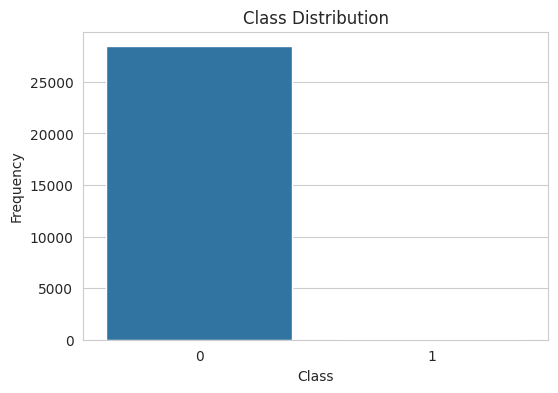

In [ ]:
# Check the distribution of the target variable
print("Class distribution:")
print(y.value_counts())

# Visualize the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


Class distribution:
Class
0    5690
1       7
Name: count, dtype: int64


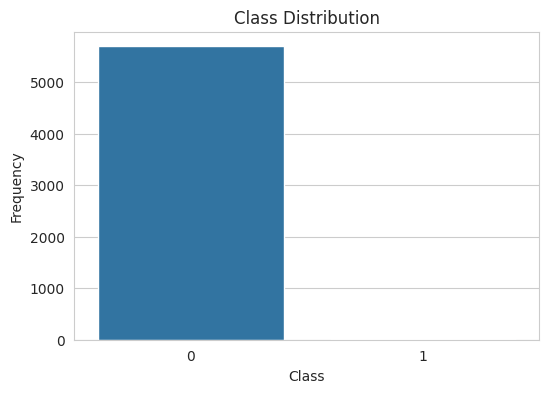

In [ ]:
# Check the distribution only for the Test set
print("Class distribution:")
print(y_test.value_counts())

# Visualize the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Question 2:

- What do you observe about the class distribution?
- How might this affect the model's performance and the evaluation metric we chose?

---

**Discuss your observations before moving on.**


<font color='red'>From the figures and the values, we can see that the class distubition is highly unbalanced;  having a significant number of non-fraudulent transactions compared to fraudulent transactions. This unbalance affect the model´s performance, leading it to achieve a very high accuracy by predicting the majority class. As a result,  accuracy might is not the suitable metric for this dataset.

## 8. Evaluate the Model Using Confusion Matrix

The confusion matrix provides a more detailed breakdown of model performance.

---

**Instructions:**

- Compute the confusion matrix for the test predictions.
- Display the confusion matrix using a heatmap.


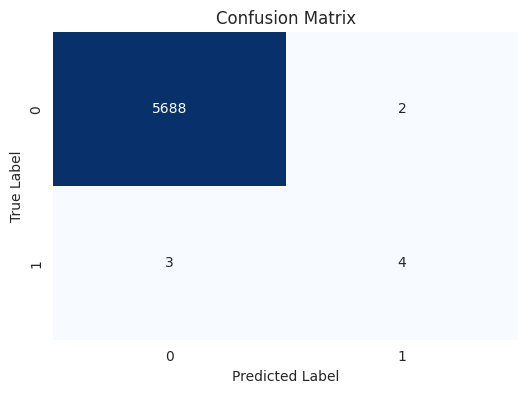

Confusion Matrix:
[[5688    2]
 [   3    4]]


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, res)

# Display confusion matrix using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(cm)


### Question 3:

- Based on the confusion matrix, how many fraudulent transactions did the model correctly identify?
- How many did it miss?
- Does this align with the high accuracy score obtained earlier?

---

**Reflect on these questions before proceeding.**



 <font color='red'>
*The model correctly identified 4 fraudulent transactions.             

<font color='red'>* The model missed 3 fraudulent transactions.

<font color='red'>* Accuracy =  (5688+4)/(5688+4+2+3) =  0.999122. Yes it aligns with the high accuracy score we obtained before. The model achieved a high accuracy because most transactions in the dataset are non-fraudulent, and the model correctly predicted the majority of these non-fraudulent transactions.


## 9. Evaluate the Model Using Precision and Recall

Accuracy may not be sufficient for imbalanced datasets. Let's calculate **precision** and **recall** to get a better understanding.

---

**Instructions:**

- Calculate the **precision** and **recall** of the model (set zero_division to 0).
- Print out the precision and recall scores.


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, res, zero_division=0)             #If there is a division by zero, return 0 instead of raising an error.
recall = recall_score(y_test, res, zero_division=0)

# Print precision and recall
print(f"Precision of the model: {precision:.6f}")
print(f"Recall of the model: {recall:.6f}")


Precision of the model: 0.666667
Recall of the model: 0.571429


### Question 4:

- What do the precision and recall scores tell you about the model's performance?
- Why might these metrics be more informative than accuracy in this context?

---

**Consider these questions before moving forward.**


<font color='red'>We can say that the model´s performace is more or so acceptable. The precision indicates that about 66.67% of the transactions predicted as fraudulent were actually fraudulent, while recall shows that the model identified 57.14% of all actual fraudulent transactions. This means the model misses about 42.86% of fraud cases. These metrics are more informative than accuracy in our case example, because they focus more on the minory class and are more convinient when having an unbalanced dataset. High accuracy can be misleading if the model fails to detect fraud, making precision and recall better metrics for evaluating the model's performance.

## 10. Understanding Precision and Recall

- **Precision** measures the proportion of positive identifications that were actually correct.
- **Recall** measures the proportion of actual positives that were identified correctly.

In the context of fraud detection:

- **Precision** answers: "Of all transactions predicted as fraudulent, how many were actually fraudulent?"
- **Recall** answers: "Of all actual fraudulent transactions, how many did the model detect?"

---

Given the low recall score, our model is missing many fraudulent transactions.


## 11. Improving the Model

One way to address the issue of class imbalance is to apply resampling techniques.

---

**Instructions:**

- Install the `imbalanced-learn` library.
- Use **Synthetic Minority Over-sampling Technique (SMOTE)** to balance the classes in the training set.


In [ ]:
# Install imbalanced-learn library
!pip install imbalanced-learn

# Import SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())


Resampled class distribution:
Class
0    22748
1    22748
Name: count, dtype: int64


## 12. Re-train the Model on Resampled Data

---

**Instructions:**

- Initialize a new logistic regression classifier.
- Train the classifier on the resampled training data.


In [ ]:
# Initialize the classifier
clf_resampled = LogisticRegression()

# Train the classifier
clf_resampled.fit(X_resampled,y_resampled)


LogisticRegression()

## 13. Evaluate the New Model

---

**Instructions:**

- Use the new model to make predictions on the test set.
- Calculate accuracy, precision, and recall.
- Display the confusion matrix.


Accuracy of the resampled model: 0.994559
Precision of the resampled model: 0.184211
Recall of the resampled model: 1.000000


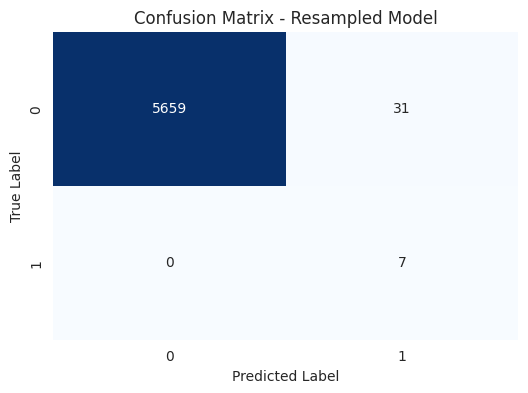

Confusion Matrix - Resampled Model:
[[5659   31]
 [   0    7]]


In [ ]:
# Make predictions on the test set
res_resampled = clf_resampled.predict(x_test)

# Calculate evaluation metrics
accuracy_resampled = accuracy_score(y_test,res_resampled)
precision_resampled = precision_score(y_test, res_resampled, zero_division=0)
recall_resampled = recall_score(y_test, res_resampled, zero_division=0)

# Print evaluation metrics
print(f"Accuracy of the resampled model: {accuracy_resampled:.6f}")
print(f"Precision of the resampled model: {precision_resampled:.6f}")
print(f"Recall of the resampled model: {recall_resampled:.6f}")

# Compute confusion matrix
cm_resampled = confusion_matrix(y_test, res_resampled)

# Display confusion matrix using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Resampled Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print confusion matrix values
print("Confusion Matrix - Resampled Model:")
print(cm_resampled)


## 14. Visualize Model Performance

Let's visualize the performance of both models using Precision-Recall and ROC curves.

---

**Instructions:**

- Plot the **Precision-Recall Curve** for the resampled model.
- Plot the **ROC Curve** for the resampled model.
- Include the AUC in the plots


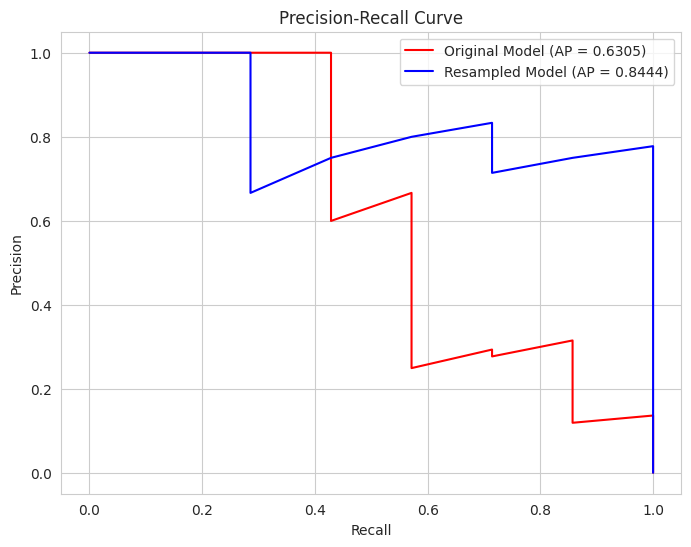

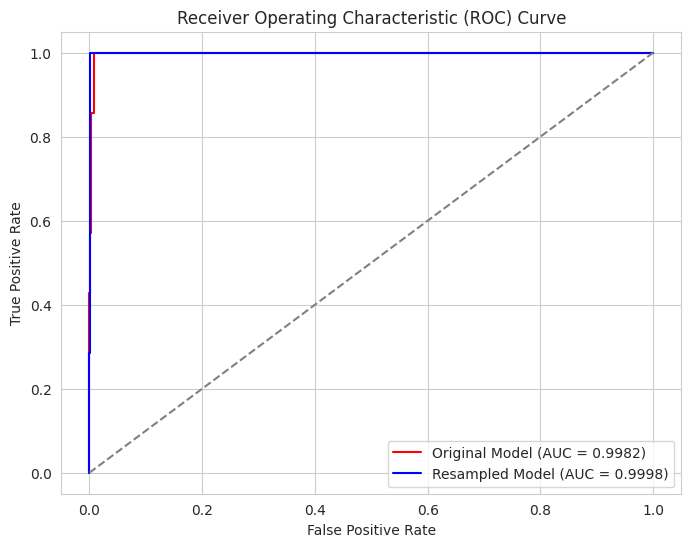

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score

# Get the decision scores for both models
y_scores_original = clf.decision_function(x_test)
y_scores_resampled = clf_resampled.decision_function(x_test)

# Calculate precision-recall pairs for both models
precision_orig, recall_orig, _ = precision_recall_curve(y_test, y_scores_original)
precision_resampled, recall_resamppled, _ =  precision_recall_curve(y_test, y_scores_resampled)

# Calculate Average Precision (AP) scores
ap_orig = average_precision_score(y_test,y_scores_original)
ap_resampled = average_precision_score(y_test,y_scores_resampled)
# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_orig, precision_orig, color='r', label=f'Original Model (AP = {ap_orig:.4f})')
plt.plot(recall_resampled, precision_resampled, color='b', label=f'Resampled Model (AP = {ap_resampled:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate ROC curves for both models
fpr_orig, tpr_orig, _ = roc_curve(y_test,y_scores_original)
roc_auc_orig = auc(fpr_orig, tpr_orig)

fpr_resampled, tpr_resampled, _ = roc_curve(y_test,y_scores_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, color='r', label=f'Original Model (AUC = {roc_auc_orig:.4f})')
plt.plot(fpr_resampled, tpr_resampled, color='b', label=f'Resampled Model (AUC = {roc_auc_resampled:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


### Question 6:

In the context of imbalanced datasets, is it more appropriate to evaluate model performance using the AUC of the ROC curve or the AUC of the Precision-Recall (PR) curve? Explain your reasoning.

---

**Reflect on this question and consider how each metric responds to changes in class imbalance and which provides more informative insights into model performance on the minority class.**

---

**Hint:**

- Think about how the **ROC curve** (Receiver Operating Characteristic curve) and its AUC (Area Under the Curve) represent the trade-off between the true positive rate and the false positive rate.
- Consider how the **Precision-Recall curve** focuses on the trade-off between precision (positive predictive value) and recall (sensitivity) and how it behaves when dealing with imbalanced classes.
- Recall that in imbalanced datasets, the number of negative instances far outweighs the number of positive instances, which can influence the interpretation of evaluation metrics.

---

**After contemplating, write down your answer and reasoning.**


<font color='red'>In the context of imbalanced datasets, the AUC of the Precision/Recall (PR) curve is more suitable to evaluate the model's performance. Because PR curves directly address the model's ability to perform well on the minority class; since the number of the fraudulent class is very rare compared to the non-fraudulent class, we want an evaluation metric that can compare the performance of different classsification models and is able to distinguish betwwen the positive and negative classes. Which the ROC curve struggles at doing, beacuse it gives an overly optimistic view of model performance, as it tends to be dominated by the true negatives (correctly identifying non-fraudulent transactions), which are far more.

## 15. Conclusion

In this lab, we:

- Discovered that using **accuracy** as an evaluation metric on imbalanced data can be misleading.
- Learned that **precision** and **recall** provide better insights into model performance on imbalanced datasets.
- Applied **SMOTE** to address class imbalance, which improved the model's ability to detect fraudulent transactions.
- Understood the trade-offs between precision and recall.

---

### Final Questions:

1. **Why is accuracy not a reliable metric for imbalanced datasets?**

2. **How do precision and recall complement each other in evaluating model performance?**

3. **What are the potential downsides of resampling techniques like SMOTE?**

4. **In what situations might you prioritize precision over recall, or vice versa?**

---

**Reflect on these questions and write down your answers.**


<font color='red'>1. Accuracy is not a reliable metric in the case of imbalanced datasets because in the case where one class signifciantly outweights the other class, it focuses  on the majority class (how many did you get right) which gives a misjudgement and can be misleading in crucial cases.

<font color='red'>2. Precision and recall complement each other in a way that they both give how good the model is at predicitng specific category. We can say that precision can be seen a measure of quality, and recall as a measurure of quantity. Meaning that when there is a high precision and low recall, and only if it is confident, the model predicts the most the relevant cases (out of the positive predicted values , it returns the positive ones more and minimizes the false positives).On the other hand, when there is a high recall and low precision, the model returns most of the relevant ones, focusing on the quantity of the positive values (when the positive values are predicted, it correctly idientifies them the most)  . Using both metrics helps give a more balanced view of the performance, especially in the case of unbalanced data sets.

<font color='red'>3. SMOTE is a nice choice when having an unbalanced classification. However, it does have downsides,first when use SMOTE, by generating synthetic samples, sometimes it can introduce noise or irrelevant patterns, when it creates samples that are too similar to existing data points. This may cause the model to overfit the training data, reducing its ability to generalize well to unseen test data. Using SMOTE also increases the cost and has long fonctional time due to the high size of the dataset.

<font color='red'>4. Precision might be priotized in the case where im very confident about my model and when the flase positive case is more important to me. Recall is prioritized when we want to avoid missing the rare class, and the false negative case is more important.</font>

## Additional Resources

- **Imbalanced-learn Documentation:** [https://imbalanced-learn.org/stable/](https://imbalanced-learn.org/stable/)
- **Scikit-learn Metrics and Scoring:** [https://scikit-learn.org/stable/modules/model_evaluation.html](https://scikit-learn.org/stable/modules/model_evaluation.html)
- **Precision and Recall Explained:** [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)
